## Assignment 4: Time Series and A/B Testing 

##### By: Shimony Agrawal

In [3]:
%cd /Users/shimonyagrawal/Desktop
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/shimonyagrawal/Desktop


## Part 1: Working with Time Series Data 

#### A. Pick any publicly-traded company that trades on the Nasdaq or the NYSE. What company did you select, and what is its ticker symbol?

#### B. Go to Yahoo! Finance: finance.yahoo.com. Enter your company’s ticker symbol in the search bar near the top of your screen. Next, click on “Historical Data” and then “Download.” This will automatically download a .csv with one year’s worth of the company’s data onto your computer.

In [12]:
Target = pd.read_csv('TGT.csv')

#### C. Bring the dataset into your environment.
#### a. Use the head() function to explore the variables.
#### b. Next, call the info() function on your dataset.

In [13]:
Target.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-08,110.559998,110.980003,109.419998,110.150002,107.774284,2805400
1,2019-11-11,110.629997,110.860001,109.760002,110.449997,108.067810,3082700
2,2019-11-12,110.220001,110.279999,107.910004,108.349998,106.013100,5429600
3,2019-11-13,108.629997,109.230003,107.019997,108.580002,106.238144,3653900
4,2019-11-14,110.709999,111.250000,109.559998,111.110001,108.713570,5968400


In [14]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


#### D. Is this dataframe indexed by time values? How do you know this?

The info function shows the date column as an index. This shows that the dataframe is not indexed. 

#### E. If you answered no to the previous question, you will need to tell Python that this data is actually a time series. Convert it to a time series now -- do this without reading the entire file back into your environment.

In [15]:
Target['Date'] = pd.to_datetime(Target['Date'])

In [16]:
Target.set_index('Date', inplace=True)

In [17]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-11-08 to 2020-11-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


#### F. In your Jupyter Notebook, view the index attribute of your time series.
#### a. Now, view the max and min value of your index attribute.
#### b. Now, view the argmax and argmin values of your index attribute.
#### c. What do the results of max, min, argmax, and argmin represent?

The maximum represents the the last day (2020-11-06) of the 1-year cycle and the minimum represents the first day (2019-11-08) of the 1-year cycle. The argmin and argmax return the index values or the position of the minimum and maximun values in the dataframe. Here, the index value for index.min is 0 and index.max is 251. 

In [18]:
Target.index 

DatetimeIndex(['2019-11-08', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-18', '2019-11-19',
               '2019-11-20', '2019-11-21',
               ...
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [19]:
Target.index.max()

Timestamp('2020-11-06 00:00:00')

In [20]:
Target.index.min()

Timestamp('2019-11-08 00:00:00')

In [21]:
Target.index.argmax()

251

In [22]:
Target.index.argmin()

0

#### G. Let’s visualize the entire time series.
#### a. Create a line plot that depicts all of the movement of your ‘Close’ variable for your stock.

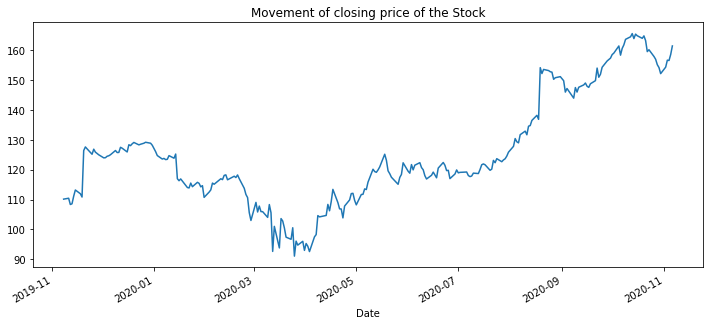

In [23]:
ts = Target.Close.plot(title = 'Movement of closing price of the Stock', fontsize=10, figsize=(12,5))

#### b. Now, add a horizontal, dashed line that spans the entire length of your graph. The height of this line should represent the mean ‘Close’ value from your dataset. Color this line with any color that you like (you might even want to try a hexadecimal value!)

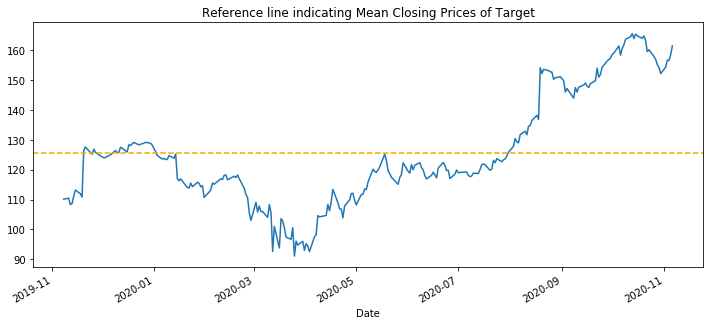

In [34]:
ts = Target.Close.plot(title = 'Reference line indicating Mean Closing Prices of Target', fontsize = 10, figsize = (12,5))
ts.axhline(np.mean(Target.Close), color = 'orange', linestyle = '--');

#### c. As we all know, 2020 has been a pretty crazy year -- and for stock market investors, it has sometimes felt like a ride. Use shading to show the contrast between February, March, April, May, and June of 2020. Shade each of these months in a slightly different way on the graph. 

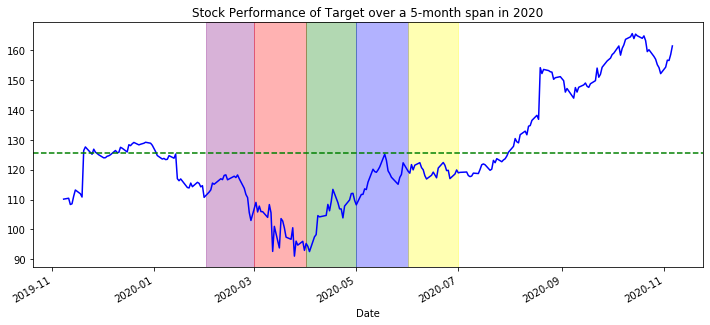

In [33]:
ax = Target['Close'].plot(title = 'Stock Performance of Target over a 5-month span in 2020', color = 'blue',
                          fontsize=10, figsize=(12,5))
ax.axvspan('2020-02-01', '2020-03-01', color='purple', alpha=0.3) #Feb
ax.axvspan('2020-03-01', '2020-04-01', color='red', alpha=0.3) #March 
ax.axvspan('2020-04-01', '2020-05-01', color='green', alpha=0.3) #April
ax.axvspan('2020-05-01', '2020-06-01', color='blue', alpha=0.3) #May
ax.axvspan('2020-06-01', '2020-07-01', color='yellow', alpha=0.3) #June
ax.axhline(np.mean(Target.Close), color = 'green', linestyle = '--');

#### i. In a few sentences, how did your stock perform across this five-month span? You don’t need to do any outside research or analysis to answer this -- just describe what your graph is showing.

Based on the graph, it can be seen at the begining of the 5-month span the closing price was ~ $110 and towards the end it slightly increased to ~ $119. Target being a huge company this small change is due to the pandemic which hit world around February end. The adverse outcome of the pandemic can be seen during the end of February and whole of March. March was the worst hit month due to the uncertainity that virus brought. People were reluctant to step out and there were no measures or guidelines to fight the virus. But as things got clearer and we had a set of guidelines to follow to deal with the pandemic, the closing stock prices rose again. The rise in prices may have been due to increase in demand for groceries, essentials and healthcare items during the pandemic. As we can see, November 2020 has the highest closing price in a year due to Target being the prime choice for people to stock up on their essentials. 

#### H. Let’s visualize some Simple Moving Averages. Show 5, 10, and 20-day Simple Moving averages of the ‘Close’ variable for your company’s data in three separate line graphs. Each time, include the daily closing price for your company overlaid on your graph.

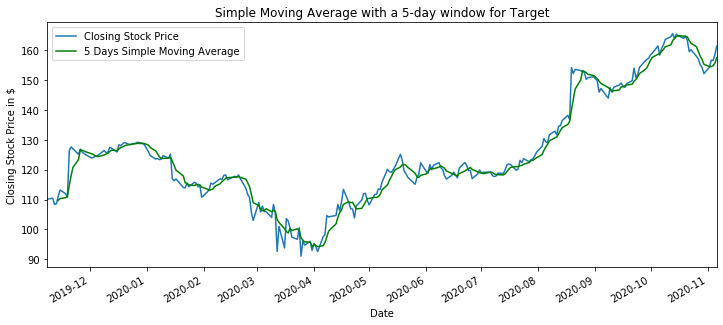

In [38]:
Target['Close'].plot(title = 'Simple Moving Average with a 5-day window for Target',fontsize = 10, 
                     figsize=(12,5), label = 'Closing Stock Price').autoscale(axis='x',tight = True);
Target.rolling(window = 5).mean()['Close'].plot(color = 'green', label = '5 Days Simple Moving Average');
plt.legend();
plt.xlabel('Date')
plt.ylabel('Closing Stock Price in $');

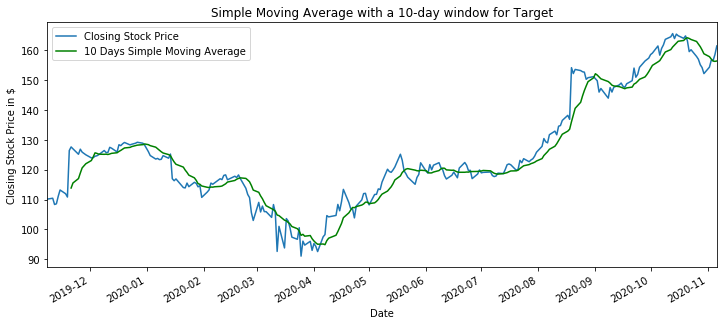

In [37]:
Target['Close'].plot(title = 'Simple Moving Average with a 10-day window for Target',fontsize = 10, 
                     figsize=(12,5), label = 'Closing Stock Price').autoscale(axis='x',tight = True);
Target.rolling(window = 10).mean()['Close'].plot(color = 'green', label = '10 Days Simple Moving Average');
plt.legend();
plt.xlabel('Date')
plt.ylabel('Closing Stock Price in $');

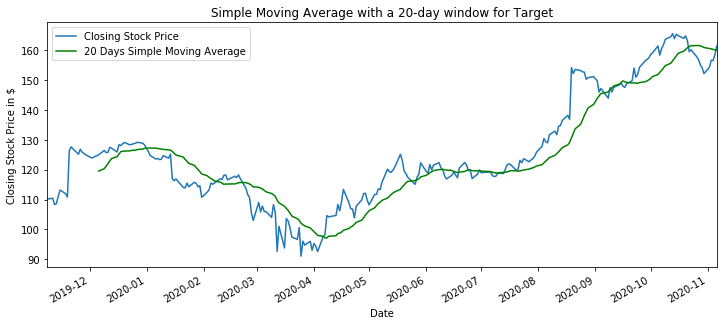

In [36]:
Target['Close'].plot(title = 'Simple Moving Average with a 20-day window for Target',fontsize = 10, 
                     figsize=(12,5), label = 'Closing Stock Price').autoscale(axis='x',tight = True);
Target.rolling(window = 20).mean()['Close'].plot(color = 'green', label = '20 Days Simple Moving Average');
plt.legend();
plt.xlabel('Date')
plt.ylabel('Closing Stock Price in $');

#### a. How did the three simple moving average plots compare to one another? How are they similar, and how are they different?

In terms of similarity, all the 3 moving averages follow the same upward and downward trends. The 5-day and 10-day averages are mirroring the data however, the 20-day average has a lesser effect on the sudden changes. In terms of differences, the 5 day average is more prone to fluctuations while the 10 and 20 day averages are more stable.


#### b. What are some pros and cons of using simple moving averages? What about the pros and cons of using shorter or longer k-values in a moving average?

The simple moving average calculates the average of a selected range of prices here, the closing stock price, by the number of periods in that range. The key advantage of simple moving averages is that it is less prone to fluctuations due to temprorary changes in the prices and hence, it gives a smoothed line. This allows to identify the long term behaviour. The disadvantage of simple moving averages is that while it smoothes out temporary price changes, it doesn't respond well to rapid price changes. Moving averages have a 'lagging effect' because they are derived from the past data. 

The shorter moving averages have a lot of fluctuations becuase it will be sensitive to changes in the current scenario. Also, they tend to mirror the data.The longer moving averages are best suited to identify a long-term direction. There are fewer changes in longer k-values since they are more stable. When comparing the moving averages, the higher the k-value, the stronger the trend since it has more number of data points. 

#### I. Next, we will try something called resampling.
#### a. Resample your time series so that its values are based on some different unit of time (larger than daily).

In [115]:
Target.resample(rule='M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-30,117.970667,118.934666,116.490000,117.916667,115.758281,7.553320e+06
2019-12-31,126.963333,127.817618,126.132381,127.017619,125.015057,3.625167e+06
2020-01-31,119.253810,120.227619,118.058572,118.947620,117.072288,6.367229e+06
2020-02-29,114.534210,115.622631,113.487895,114.421053,112.916403,4.170647e+06
2020-03-31,100.087273,104.086818,97.449545,100.565454,99.543246,7.696782e+06
2020-04-30,104.382381,106.559048,102.685238,105.092380,104.024157,6.193238e+06
2020-05-31,117.417499,119.351000,115.933500,117.576001,116.630645,6.293110e+06
2020-06-30,119.957272,121.257273,118.326364,119.637727,119.049230,4.751391e+06
2020-07-31,120.912728,122.197272,119.940000,121.058181,120.462697,3.072859e+06


#### i. Plot this newly-resampled time series.

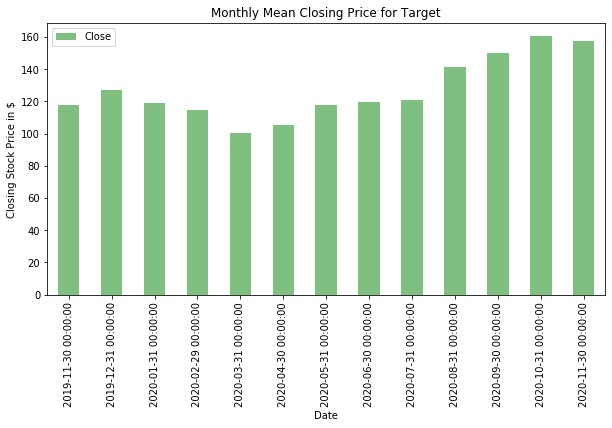

In [39]:
title = 'Monthly Mean Closing Price for Target'
Target['Close'].resample('M').mean().plot.bar(title=title, figsize = (10,5), 
                                              fontsize = 10, color= 'green', alpha = 0.5);
plt.legend();
plt.xlabel('Date')
plt.ylabel('Closing Stock Price in $');

#### ii. Provide an example that explains why someone might care about resampling. To answer this, you may use ANY example that you can think of, or discover, from any field that uses time series data (health, weather, market forecasting, etc.) 

Resampling changes the frequency of the data. If it was initially being analyzed by months, resampling changes it to weeks or quarters or even years. It aggregates the time series data. In the stock market, with the data changing every second it would be difficult to keep track of it. Resampling will aggregate the data into weeks, business days or months to better understand and analyse the data. 

## Part 2: Using Statistical Test to analyze data

#### A. Lobster Land built its dice so that they will perform in a similar manner as the randint() function from the random module in Python. Using Python, simulate 120 rolls of a dice, being sure to use random.randint() to generate the values. 

In [42]:
import random

results = []
i = 0

def diceroll(times):
    for i in range(0, times): 
        value = random.randint(1,6)
        results.append(value)
        i = i + 1

In [43]:
diceroll(120)
results = np.array(results)
results

array([4, 2, 4, 5, 4, 6, 2, 3, 4, 2, 2, 5, 1, 6, 6, 6, 6, 4, 6, 6, 4, 2,
       3, 5, 1, 2, 3, 4, 4, 5, 3, 2, 6, 2, 6, 5, 3, 5, 6, 2, 5, 2, 2, 6,
       2, 6, 1, 3, 4, 4, 5, 5, 5, 5, 4, 2, 2, 1, 4, 4, 6, 2, 2, 2, 1, 3,
       5, 5, 6, 2, 2, 3, 1, 1, 3, 4, 5, 4, 3, 3, 3, 4, 6, 4, 3, 2, 2, 5,
       6, 5, 5, 6, 5, 4, 6, 5, 1, 2, 4, 1, 1, 5, 5, 1, 1, 4, 5, 2, 1, 4,
       5, 6, 4, 5, 2, 5, 2, 4, 6, 4])

In [44]:
outcome_1 = np.count_nonzero(results == 1)
outcome_2 = np.count_nonzero(results == 2)
outcome_3 = np.count_nonzero(results == 3)
outcome_4 = np.count_nonzero(results == 4)
outcome_5 = np.count_nonzero(results == 5)
outcome_6 = np.count_nonzero(results == 6)

In [45]:
print(outcome_1, outcome_2, outcome_3, outcome_4, outcome_5 ,outcome_6)

13 25 13 24 25 20


#### If this were a completely fair dice, how many instances of 1, 2, 3, 4, 5, and 6 would you expect to result from this simulation? How many of each outcome did you actually get?

In an ideal situation, if the dice was rolled 120 times each number should have an equal chance of occuring i.e. each number should occur 20 times. However as shown, the simulation gives different results. Here, the number 2 and 5 have the highest chances wherease number 1 and 3 have the lowest. 

#### B. Using an appropriate statistical test, determine whether your results support the claim made by the angry park visitor.

In [46]:
import scipy.stats
from scipy.stats import chisquare

observed_values=scipy.array([outcome_1, outcome_2, outcome_3, outcome_4, outcome_5 ,outcome_6])
expected_values=scipy.array([20,20,20,20,20,20])

chisquare(observed_values, expected_values)

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  after removing the cwd from sys.path.
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """


Power_divergenceResult(statistic=8.2, pvalue=0.14555224294735783)

#### What is the null hypothesis? Based on the evidence here, will you reject or fail to reject the null hypothesis?

The null hypothesis is the expected value of the diceroll. Here, since the p-value is greater than 0.05, we will not reject the null hypothesis. This is because the results will be in line with the expected values i.e. 20. 

#### C. Run the simulated dice roll again, but this time, use 1200 rolls, rather than 120. Using these newly-obtained values, run your statistical test again. 

In [47]:
import random

results = []
i = 0

def diceroll(times):
    for i in range(0, times): 
        value = random.randint(1,6)
        results.append(value)
        i = i + 1

In [48]:
diceroll(1200)
results = np.array(results)
results

array([4, 5, 3, ..., 2, 3, 1])

In [49]:
outcome_1 = np.count_nonzero(results == 1)
outcome_2 = np.count_nonzero(results == 2)
outcome_3 = np.count_nonzero(results == 3)
outcome_4 = np.count_nonzero(results == 4)
outcome_5 = np.count_nonzero(results == 5)
outcome_6 = np.count_nonzero(results == 6)

print(outcome_1, outcome_2, outcome_3, outcome_4, outcome_5 ,outcome_6)

183 214 224 209 206 164


In [51]:
import scipy.stats
from scipy.stats import chisquare

observed_values=scipy.array([outcome_1, outcome_2, outcome_3, outcome_4, outcome_5 ,outcome_6])
expected_values=scipy.array([200,200,200,200,200,200])

chisquare(observed_values, expected_values)

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  after removing the cwd from sys.path.
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """


Power_divergenceResult(statistic=12.370000000000001, pvalue=0.03005499855972824)

#### How did your test statistic change? How will you interpret these results?

The chisquare statistic increased while the p-value decreased. As seen from the observed values, they are deviating from the expected values. Hence, due to the p-value being lower than 0.05, we will reject the null hypothesis in this case. 


#### D. Run the simulated dice roll another time, but this time, use 12,000 rolls, rather than 1200. Run the statistical test yet again. 

In [52]:
import random

results = []
i = 0

def diceroll(times):
    for i in range(0, times): 
        value = random.randint(1,6)
        results.append(value)
        i = i + 1

In [53]:
diceroll(12000)
results = np.array(results)
results

array([6, 5, 1, ..., 1, 2, 4])

In [54]:
outcome_1 = np.count_nonzero(results == 1)
outcome_2 = np.count_nonzero(results == 2)
outcome_3 = np.count_nonzero(results == 3)
outcome_4 = np.count_nonzero(results == 4)
outcome_5 = np.count_nonzero(results == 5)
outcome_6 = np.count_nonzero(results == 6)

print(outcome_1, outcome_2, outcome_3, outcome_4, outcome_5 ,outcome_6)

1994 2019 1977 2082 1961 1967


In [56]:
import scipy.stats
from scipy.stats import chisquare

observed_values=scipy.array([outcome_1, outcome_2, outcome_3, outcome_4, outcome_5 ,outcome_6])
expected_values=scipy.array([2000,2000,2000,2000,2000,2000])

chisquare(observed_values, expected_values)

/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  after removing the cwd from sys.path.
/Users/shimonyagrawal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """


Power_divergenceResult(statistic=5.13, pvalue=0.40022185895215523)

#### How did your test statistic change? How will you interpret these results?

Here, the chisquare statistic reduced further while the p-value increased significantly. Here too, we will not reject the null hypothesis since the observed values are in line with the expected values. This indicates that as we increase the number of dicerolls, the scope of the values differing the expected values reduces. 

#### E. What general trend did you notice as you increased the number of dice rolls in the simulation? Why do you think this is the case? To answer this, you don’t need to cite any formal statistics rules or formulas -- you can answer this in your own words, in a couple of sentences.